Welcome to the **Running Test Cases with Coverage** lab. Test coverage is the percentage of lines of code that execute during all of the tests. High test coverage gives you confidence that a large amount of code is executed during testing. In turn, the more lines of code that execute through tests, the more confident you can be that your code works as expected.

In this lab, you will learn how to improve your test coverage by generating a test coverage report, interpreting the report to determine which lines of code do not have test cases, and writing test cases to cover those lines.

# Learning Objectives

After completing this lab, you will be able to:
* Generate a test coverage report
* Interpret a test coverage report to determine which lines of code are not covered by test cases
* Write enough new test cases to reach `100%` test coverage

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository:

`git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git`

## Change into the Lab Folder

Once you have cloned the repository, change to the lab directory: `cd duwjx-tdd_bdd_PracticeCode/labs/04_test_coverage`

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab:

`python3.8 -m pip install -r requirements.txt`

**You are now ready to start the lab.**
* Navigate to the **`duwjx-tdd_bdd_PracticeCode/labs/04_test_coverage`** folder. 
* This folder contains all of the source code that you will use for this lab.
* You will do all your editing work in the file `tests/test_account.py`. 

# Start by Running the Tests

Before writing any code, you should always check that the test cases are passing. 

Otherwise when they fail, you won’t know if you broken the code, or if the code was broken before you started.

Let’s run `nosetests` and produce a `coverage` report to identify the lines that are missing code coverage.

Your initial report should look like this:

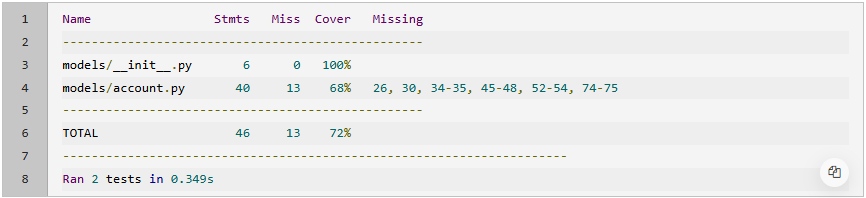

You are starting with **`72%`** test coverage. 

Your goal is to reach **`100%!`**

Let’s go look at the first missed line, line `26` in `account.py` to see if we can write a test case for it.

# Step 1: Missing Line 26

The coverage report indicated that line `26` in `account.py` doesn’t have a test case that executes it.

## Your Task

To increase your test coverage, first investigate line `26` in `models/account.py`. 

This file is in the model package from the root of the repo.

You should see the following code on lines `25` and `26`.

```
def __repr__(self):
    return '<Account %r>' % self.name
```

Notice that this method is one of the magic methods that is called to represent the class when printing it out.

Your task is to add a new test case in `test_account.py` that calls the `__repr__()` method on an `Account`.
> ***Note:** Call the `__repr__()` method by using the `str()` function on account.*

## Solution(`test_account.py`)

In [4]:
def test_repr(self):
    """Test the representation of an account"""
    account = Account()
    account.name = "Foo"
    self.assertEqual(str(account), "<Account 'Foo'>")

# Step 2: Missing Line 30

Run `nosetests` again to ensure line `26` is now covered through testing and to determine the next line of code for which you should write a new test case.

If you completed the previous step correctly, your test coverage report should look like this:

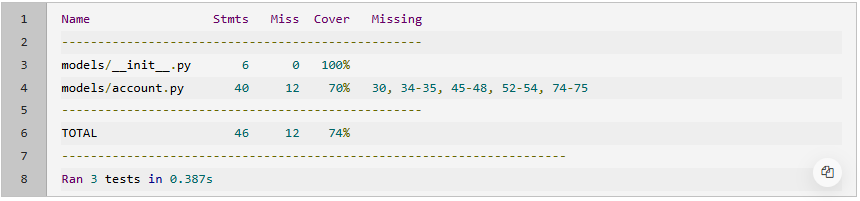

Note that your overall test coverage increased from **`72%`** to **`74%`** and the new report does not list line `26` in the **Missing** column. 

The next line of code listed under that column is `30`. 

Examine this line in `account.py` to find out what that code is doing.

## Your Task

You should see the following code on lines `28` through `30`.

```
def to_dict(self) -> dict:
    """Serializes the class as a dictionary"""
    return {c.name: getattr(self, c.name) for c in self.__table__.columns}
```

Notice that this code is the **`to_dict()`** method. 

Your task is to add a new test case in `test_account.py` that executes the **`to_dict()`** method on an Account.

## Solution(`test_account.py`)

In [5]:
def test_to_dict(self):
    """ Test account to dict """
    data = ACCOUNT_DATA[self.rand] # get a random account
    account = Account(**data)
    result = account.to_dict()
    self.assertEqual(account.name, result["name"])
    self.assertEqual(account.email, result["email"])
    self.assertEqual(account.phone_number, result["phone_number"])
    self.assertEqual(account.disabled, result["disabled"])
    self.assertEqual(account.date_joined, result["date_joined"])

# Step 3: Missing Lines 34-35

Run `nosetests` again to ensure line `30` is now covered through testing and to determine the next line of code for which you should write a new test case.

If you completed the previous steps correctly, your test coverage report should look like this:

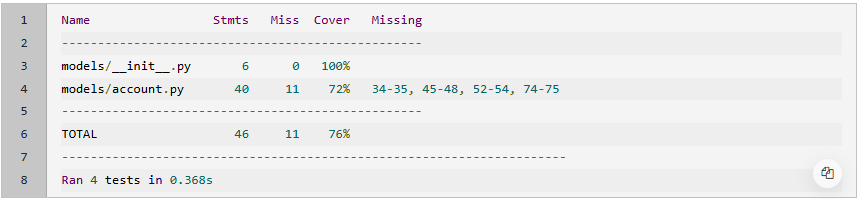

Note that your overall test coverage increased from **`74%`** to **`76%`**. 

The next lines of code listed in the Missing column are **`34-35`**. 

Examine these lines in `account.py` to find out what that code is doing.

## Your Task

You should see the following code on lines `34` and `35`.

```
def from_dict(self, data: dict) -> None:
    """Sets attributes from a dictionary"""
    for key, value in data.items():
        setattr(self, key, value)
```

Notice that this code is the **`from_dict()`** method. 

Your task is to add a new test case in `test_account.py` that executes the **`from_dict()`** method on an Account.

## Solution(`test_account.py`)

In [6]:
def test_from_dict(self):
    """ Test account from dict """
    data = ACCOUNT_DATA[self.rand] # get a random account
    account = Account()
    account.from_dict(data)
    self.assertEqual(account.name, data["name"])
    self.assertEqual(account.email, data["email"])
    self.assertEqual(account.phone_number, data["phone_number"])
    self.assertEqual(account.disabled, data["disabled"])

# Step 4: Missing Lines 45-48

Run `nosetests` again to ensure lines 34 and 35 are now covered through testing and to determine the next line of code for which you should write a new test case.

If you completed the previous steps correctly, your test coverage report should look like this:

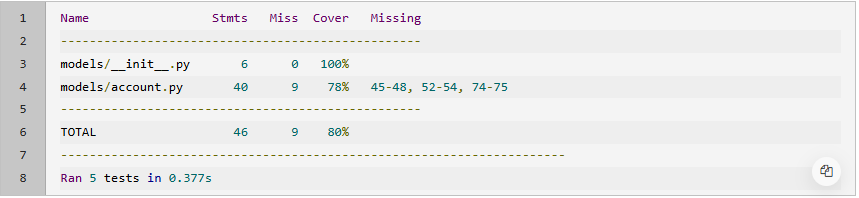

Your test coverage increased to **`80%`**! **Good job!**

## Your Task

Now examine lines **`45-48`** in `account.py` to find out what that code is doing.

```
def update(self):
    """Updates an account to the database"""
    logger.info("Saving %s", self.name)
    if not self.id:
        raise DataValidationError("Update called with empty ID field")
    db.session.commit()
```

Notice that this code is the `update()` method. 

Your task is to add a new test case in `test_account.py` that executes the `update()` method on an Account.

## Solution(`test_account.py`)

In [7]:
def test_update_an_account(self):
    """ Test Account update using known data """
    data = ACCOUNT_DATA[self.rand] # get a random account
    account = Account(**data)
    account.create()
    self.assertIsNotNone(account.id)
    account.name = "Foo"
    account.update()
    found = Account.find(account.id)
    self.assertEqual(found.name, "Foo")

# Step 5: Missing Line 47

Run `nosetests` again to ensure lines 45 through 48 are now covered through testing and to determine the next line of code for which you should write a new test case.

This time your results should look like this:

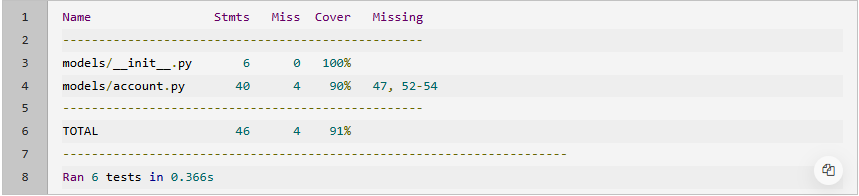

You have **`91%`** test coverage! 

**But what happened with line `47`?**

The previous test you wrote covered lines `45` through `48`, but the coverage report still lists line `47` in the **Missing** column. 

Obviously, some conditional logic was not executed in that previous test.

## Your Task

Review lines **`45-48`** of account.py to see what that code is doing.

```
if not self.id:
    raise DataValidationError("Update called with empty ID field")
```

Notice that line `47` only executes if the `update()` method is called with an id that is `None`. 

Your task is to add a new test case in `test_account.py` that executes the `update()` method and causes this line of code to run.

## Solution(`test_account.py`)

In [8]:
def test_invalid_id_on_update(self):
    """ Test invalid ID update """
    data = ACCOUNT_DATA[self.rand] # get a random account
    account = Account(**data)
    account.id = None
    self.assertRaises(DataValidationError, account.update)

# Step 6: Missing Lines 53-54

Run `nosetests` again to ensure line `47` is now covered through testing and to determine the next line of code for which you should write a new test case.

This time your results should look like this:

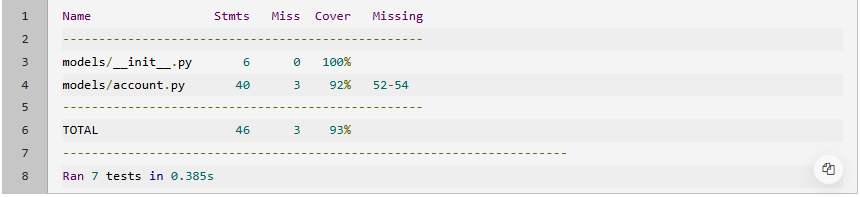

## Your Task

Examine lines **`52-54`** of `account.py` to see what that code is doing.

```
def delete(self):
    """Removes an account from the data store"""
    logger.info("Deleting %s", self.name)
    db.session.delete(self)
    db.session.commit()
```

Notice that lines **`52-54`** are the `delete()` method. 

Your task is to add a new test case in `test_account.py` that executes the `delete()` method on an Account.

## Solution(`test_account.py`)

In [9]:
def test_delete_an_account(self):
    """ Test Account update using known data """
    data = ACCOUNT_DATA[self.rand] # get a random account
    account = Account(**data)
    account.create()
    self.assertEqual(len(Account.all()), 1)
    account.delete()
    self.assertEqual(len(Account.all()), 0)

# Step 7: 100% Test Coverage

Run `nosetests` one last time to see what your test coverage is.

You have reached **`100%`** code coverage with no missing lines!

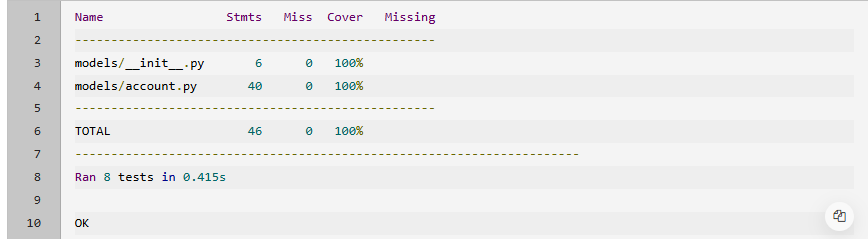